In [1]:
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from scipy.stats.kde import gaussian_kde
from numpy import linspace
from copy import deepcopy
from src.fewshot_ner_viz_component.fewshot_ner_binary_classifier import FewshotNerBinaryClassifier, CompositeEmbedder
from src.fewshot_ner_viz_component.data_processing import *

2018-08-30 18:34:18.459 INFO in 'summarizer.preprocessing.cleaner'['textcleaner'] at line 37: 'pattern' package not found; tag filters are not available for English
2018-08-30 18:34:18.517 DEBUG in 'matplotlib.backends'['__init__'] at line 90: backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
dataset_orig = read_data()

Num of train sentences: 75187
Num of valid sentences: 9603
Num of test sentences: 9479
[(['Actions', 'had', 'to', 'be', 'taken', 'to', 'break', 'through', 'the', 'blockade', '.'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']), (['On', 'a', 'night', 'in', 'late', 'July', '1940', ',', 'the', 'atmosphere', 'in', 'Zhuanbi', 'Village', 'in', 'Shaanxi', 'was', 'unusual', '.'], ['O', 'B-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'O', 'O', 'O', 'O', 'B-GPE', 'I-GPE', 'O', 'B-GPE', 'O', 'O', 'O']), (['Villager', 'Xiao', 'Jianghe', 'has', 'a', 'vivid', 'memory', 'of', 'this', 'piece', 'of', 'history', '.'], ['O', 'B-PERSON', 'I-PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']), (['On', 'that', 'dark', 'night', ',', 'everyone', 'was', 'sleeping', 'when', 'human', 'voices', 'and', 'neighing', 'horses', 'were', 'heard', 'within', 'the', 'village', '.'], ['O', 'B-TIME', 'I-TIME', 'I-TIME', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

In [3]:
ne_type = 'PERSON'
dataset = filter_dataset_by_ne_types(dataset_orig, ne_type)

Num of train sentences: 12195
Num of valid sentences: 1553
Num of test sentences: 1573


In [4]:
# embedder = CompositeEmbedder(use_elmo=True, elmo_scale=1, cap_scale=1, use_cap_feat=True, use_glove=True)
embedder = CompositeEmbedder(use_elmo=True, elmo_scale=1, cap_scale=1, use_cap_feat=False, use_glove=False)

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.


2018-08-30 18:34:21.595 INFO in 'tensorflow'['tf_logging'] at line 159: Using /tmp/tfhub_modules to cache modules.


INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/elmo/2'.


2018-08-30 18:34:21.597 INFO in 'tensorflow'['tf_logging'] at line 115: Downloading TF-Hub Module 'https://tfhub.dev/google/elmo/2'.


INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/google/elmo/2'.


2018-08-30 18:35:34.954 INFO in 'tensorflow'['tf_logging'] at line 115: Downloaded TF-Hub Module 'https://tfhub.dev/google/elmo/2'.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-30 18:35:36.983 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


In [5]:
np.random.seed(11)
data_sample_support = get_data_sample(dataset['test'], 10)
np.random.seed(12)
data_sample_query = get_data_sample(dataset['test'], 100)
print(len(data_sample_support[0]))
print(len(data_sample_query[0]))

10
100


In [6]:
X_s, y_s = get_matrices(*data_sample_support, embedder)
X_q, y_q = get_matrices(*data_sample_query, embedder)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-30 18:35:38.732 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-30 18:35:39.662 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


In [7]:
X_s_ne = X_s[y_s == 1, :]
X_s_words = X_s[y_s == 0, :]
ne_centroid_s = np.mean(X_s_ne, axis=0)
words_centroid_s = np.mean(X_s_words, axis=0)
X_q_ne = X_q[y_q == 1, :]
X_q_words = X_q[y_q == 0, :]

In [8]:
sims = {}
sims['ne_centroid_euc_dist'] = calc_sim_by_type(X_q, ne_centroid_s, sim_type='euc_dist')
sims['ne_centroid_dot_prod'] = calc_sim_by_type(X_q, ne_centroid_s, sim_type='dot_prod')
sims['ne_centroid_cosine'] = calc_sim_by_type(X_q, ne_centroid_s, sim_type='cosine')
sims['words_centroid_euc_dist'] = calc_sim_by_type(X_q, words_centroid_s, sim_type='euc_dist')
sims['words_centroid_dot_prod'] = calc_sim_by_type(X_q, words_centroid_s, sim_type='dot_prod')
sims['words_centroid_cosine'] = calc_sim_by_type(X_q, words_centroid_s, sim_type='cosine')
# sims['ne_mahalanobis'] = calc_sim_by_type(X_q, X_s_ne, sim_type='mahalanobis')
# sims['words_mahalanobis'] = calc_sim_by_type(X_q, X_s_words, sim_type='mahalanobis')

2018-08-30 18:35:41.72 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1346: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/clement/virtenv/env/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-08-30 18:35:41.103 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1346: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/clement/virtenv/env/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


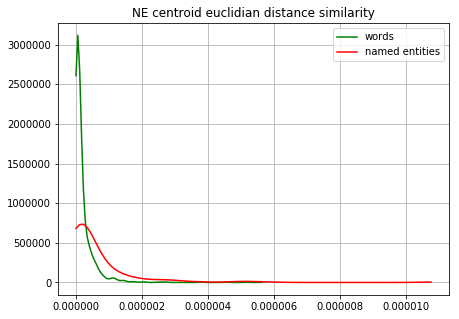

In [9]:
plotPDE(sims['ne_centroid_euc_dist'], y_q, 'NE centroid euclidian distance similarity')

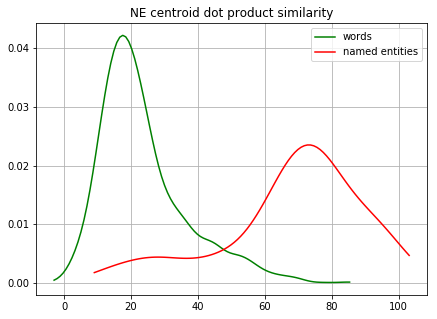

In [10]:
plotPDE(sims['ne_centroid_dot_prod'], y_q, 'NE centroid dot product similarity')

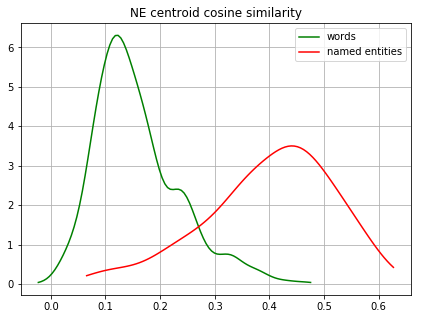

In [11]:
plotPDE(sims['ne_centroid_cosine'], y_q, 'NE centroid cosine similarity')

In [12]:
sims['ne_centroid_cosine']

array([0.38530287, 0.2833963 , 0.25569867, ..., 0.09796091, 0.0797742 ,
       0.16921265])

In [13]:
np.min(np.linalg.norm(X_q, axis=-1))

10.138761473722065

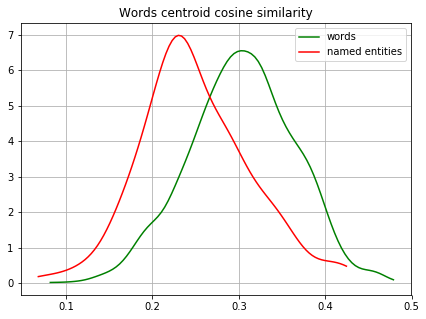

In [14]:
plotPDE(sims['words_centroid_cosine'], y_q, 'Words centroid cosine similarity')

In [15]:
# plotPDE(sims['ne_mahalanobis'], y_q, 'NE mahalanobis similarity')

In [16]:
# plotPDE(sims['words_mahalanobis'], y_q, 'Words mahalanobis similarity')

In [17]:
# dataset_orig['train'][:100]

In [18]:
euc_dist_NE_cent = calc_euc_dist(X_q, ne_centroid_s)

In [19]:
print(np.min(euc_dist_NE_cent),np.max(euc_dist_NE_cent))

11.440143525153998 24.955631170722906


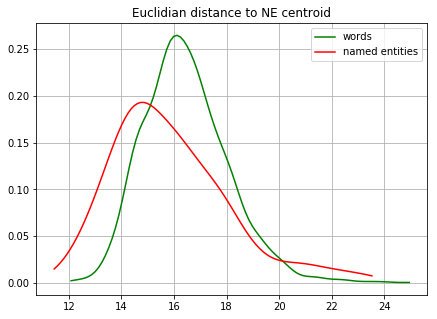

In [20]:
plotPDE(euc_dist_NE_cent, y_q, 'Euclidian distance to NE centroid')

In [21]:
np.exp(-10)

4.5399929762484854e-05

In [22]:
mah_dist_NE = calc_mahalanobis_dist(X_q, X_s_ne)
mah_dist_words = calc_mahalanobis_dist(X_q, X_s_words)

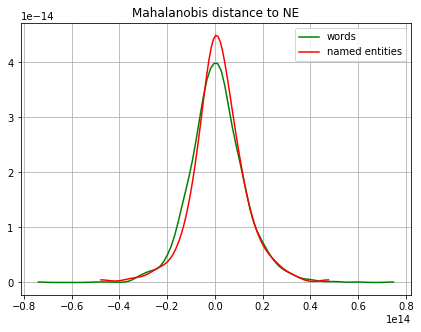

In [23]:
plotPDE(mah_dist_NE, y_q, 'Mahalanobis distance to NE')

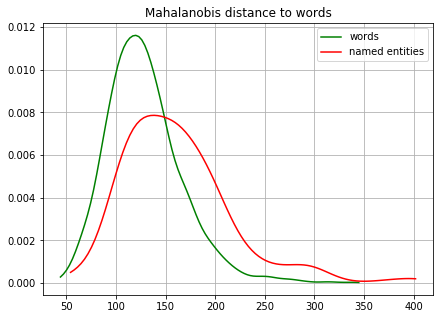

In [24]:
plotPDE(mah_dist_words, y_q, 'Mahalanobis distance to words')

In [25]:
X_cov = np.cov(X_s, rowvar=False)

In [26]:
X_cov.shape

(1024, 1024)

In [27]:
np.linalg.pinv(X_cov)

array([[ 0.65175971,  0.00568443, -0.0753965 , ...,  0.02912315,
        -0.06620336, -0.04475915],
       [ 0.00568443,  0.51121757, -0.03667209, ...,  0.00579296,
        -0.05928871,  0.03507192],
       [-0.0753965 , -0.03667209,  0.49220739, ...,  0.02580421,
         0.01520632,  0.04817246],
       ...,
       [ 0.02912315,  0.00579296,  0.02580421, ...,  0.42793379,
         0.01351571,  0.05826053],
       [-0.06620336, -0.05928871,  0.01520632, ...,  0.01351571,
         0.49634076, -0.03093133],
       [-0.04475915,  0.03507192,  0.04817246, ...,  0.05826053,
        -0.03093133,  0.4383016 ]])

In [28]:
u,s,v = np.linalg.svd(X_cov)

In [29]:
s

array([1.33998380e+01, 1.05700179e+01, 9.43932536e+00, ...,
       2.71562908e-16, 1.98032223e-16, 6.37516436e-17])

In [30]:
X_mean = np.mean(X_s, axis=0)

In [31]:
X_mean.shape

(1024,)

In [32]:
np.dot(np.dot((X_q_ne - X_mean), np.linalg.pinv(X_cov)), (X_q_ne - X_mean).T)

array([[326.7124081 ,  69.93286635,  91.74779439, ...,  32.09448043,
         46.94619935,   3.55484419],
       [ 69.93286635, 138.04433406,  13.43342876, ...,  29.3016038 ,
          6.26635507,   8.45141209],
       [ 91.74779439,  13.43342876, 315.28640966, ...,  17.31121337,
         18.36571097,   9.64579112],
       ...,
       [ 32.09448043,  29.3016038 ,  17.31121337, ..., 106.68293162,
         40.36500378,  48.97799069],
       [ 46.94619935,   6.26635507,  18.36571097, ...,  40.36500378,
        209.83919148,  62.84967313],
       [  3.55484419,   8.45141209,   9.64579112, ...,  48.97799069,
         62.84967313, 122.68624903]])

In [33]:
d=np.sqrt(np.sum(np.dot((X_q_ne - X_mean), np.linalg.pinv(X_cov))*(X_q_ne - X_mean), axis=-1))

In [34]:
d.shape

(227,)

In [35]:
X_q_ne.shape

(227, 1024)

In [36]:
print(np.min(d), np.max(d))

7.865971887337295 20.343440363341976
